# Mott Macdonald Technical Test

Part 1.2.1 <br>
Question 1 <br>
Answer: <br>
a) There are a couple of implications that can be deduced from the statistics given in the three statements. The first is that there are more engineers within Manchester than there are within London. This is not a definite fact, as the sampling method may have caused this contrast in size. Another implication that could be made is that there are more engineering companies/oppurtunities within Manchester than there are in London. This would only be the case if the sample sizes are representative of the overall population. <br>
<br>
b) Two tests will be performed to determine if the variances are equivalent followed by whether the means are different. As the population means and variances are unkown, the variances similarity will affect the test for means test, hence the order of the two tests.

In [1]:
# VARIANCE TEST
# Null hypothesis: The variances are the equivalent
# Alternative hypothesis: The variances are different
manchester_mean = 43.5
manchester_sd = 3.5
manchester_pop = 23000.0
london_mean = 41.6
london_sd = 3.0
london_pop = 10000.0

F_stat_var = manchester_sd**2 / london_sd**2
print('This is the F value %s' % F_stat_var)
# This value was calculated using this site: http://statcalculators.com/critical-f-value-calculator/ 
F_val_var = 1.0403439
print('This is the F-test statistic %s' % F_val_var)

if F_stat_var > F_val_var:
    print("Reject the Null hypothesis at a 1% significance level")
else:
    print("Do not reject the null hypothesis at a 1% significance level")

This is the F value 1.36111111111
This is the F-test statistic 1.0403439
Reject the Null hypothesis at a 1% significance level


From the above result it is evidence there is enough evidence to suggest that the two sample variances are different. From this I shall infer that the population variances also differ. The next test will compare the two means.

In [2]:
# Null hypothesis: The means are the equivalent
# Alternative hypothesis: The means are different
from numpy import sqrt
s = sqrt(((manchester_pop-1)*(manchester_sd**2) + (london_pop-1)*(london_sd**2))/(manchester_pop+london_pop-2))
v = abs((manchester_mean - london_mean) / s*(1/manchester_pop + 1/london_pop))

print('This is the V value %s' % v)

z = 2.58
print('This is the z value %s' % z)

if v > z:
    print('Reject the null hypothesis at a 1% significance level')
else:
    print('Do not reject the null hypothesis at a 1% significance level')

This is the V value 8.122139386141305e-05
This is the z value 2.58
Do not reject the null hypothesis at a 1% significance level


From the above result, there is insufficient evidence to suggest that the two means differ from each other. This is not a definitive answer, however it would be reasonable to assume that the two sample means are not different from each other. <br>
The conclusion that I would draw from this would be that the population means for the destinations London and Manchester are equivalent.

c) <br>
The conclusions are statistically significasnt at a 1% level. This means that there is a 99% confidence level within the outcome of the test. As a result the result of the test is fairly significant nd has a strong possibility to be correct.

d) <br>
To characterise the income of London engineers, I would take the median value of these. This would be the preferred statistic used over the mean as it is robust to outliers. The inter quartile range would give a rough indication of the spread of the data coupled with the range. I would assume that the median salary in London would be higher than that of Manchester due to the difference in salary due to location. <br>
To quantify this figure I would split the 10000 sized sample into two equally sized random samples excluding any outliers that may be present. The outliers would be determined to be any salary that is outside the bounds of (lower quartile + 1.5 * IQR, upper quartile + 1.5 * IQR). The Mann-Whitney test could then be applied to see if the two medians of these samples are the same. If they were then there would be a high chance that the median is true. However if they were not, then I would suggest that another sample be collected to compare with this initail 10000 sized sample.

Part 1.2.2 <br>
Question 2 <br>
Answer: <br>

To assess the performance of the model, I would use multiple metrics. To start I would create a confusion matrix with the true positive(TP), false positive(FP), true negative(TN) and false negative(FN). This would then be used to determine the metrics. The first is <br> precision = TP / (TP + FP) <br> which looks at the proportion of true defective products out of all the detected/predicted defective products. The second would be the <br> recall = TP / (TP + FN) <br> which looks at the proportion of true defective products out of all of the correctly classified products. <br>
Both recall and precision are useful as it gives a general sense of how well the classifier works. If both are high values, then this implies there are very few mis-classifications. This could also be determined through the <br> error rate = 1 - ((TP + TN) / (TP + TN + FP + FN)) <br>
The third would be the <br> F-score = (1+B^2) * ((precision * recall) / (B^2 * precision + recall)) <br> where B is pre-defined. The larger the B the greater the emphasis on recall. As we are interested in detecting the faulty products, it is idealistic do minimise the FN which requires maximising RECALL. This would be due to the fact that it is better to check a product for faults that is not faulty than allow a faulty product to be sent out without being caught. <br>

Part 1.2.3 <br>
Question 3 <br>
Answer:

It is rather hard to say what predictive model would be best without having a situation to apply the problem to as there are methods that suit certain problems better than others. However I'll give it a go.

a) <br>
As there are not a lot of instances in the data so some form of clustering method would probably be useful. It may not be known how many groups are represented in the sample, so k-nearest neighbour or k-means clustering would be most appropriate here. Leave-one-out cross validation would be the best method to avoid over-fitting. Potentially a regression model (of the form y = (a * x1)+(b * x2)+...) could also be applied if the problem suited it.

b) <br>
With rather more instances in this dataset you could split it into a training set, validation set and a test set and apply k-fold cross validation to avoid over fitting. With the same number of attributes as before, similar methods could be used as to part a). Along with those, a decision tree or some form of neural network could also be used to classify/make decisions on predictions.

c) <br>
With this dataset having a large amount of features creates a high dimensionality. So the first thing would be to reduce the dimensionality. A common approach is to start with backward elimination, however, due to the large scale of the attributes, I would probably use forward selection until some threshold had been met where the current attributes in the model reflect say 95% of the data. Another approach could be to take the combinations of two variables and remove the singular attributes/features. To graph the data, the best method (that I am aware of) is to use t-SNE. Not entirely sure of the workings behind this method however, it seems to work far better than PCA when the data is more 'muddled'.

In [3]:
from csv import reader
from numpy import unique, empty, arange, mean
import matplotlib.pyplot as plt

def open_a_file(filename):
    try:
        with open(filename, 'r') as f:
            d1 = reader(f)
            da1 = list(d1)
    except IOError as ioe:
        print("I/O Error in openning file: %s" % ioe)
    
    return da1

def get_time_and_values(d):
    time = [e[0] for e in d]
    value = [e[1] for e in d]
    return time, value

def remove_missing_values(dat):
    dat_copy = list(dat)
    number_of_missing_values = 0
    a = 0
    for each in dat_copy:
        if len(each[0]) == 0:
            dat.pop(a)
            a -= 1
            number_of_missing_values += 1
        if len(each[1]) == 0:
            dat.pop(a)
            a -= 1
            number_of_missing_values += 1
        a += 1
    
    return dat, number_of_missing_values

def create_array_of_data(the_data):
    da = empty((len(the_data), len(the_data[0])))
    for e1 in arange(0, len(the_data)):
        for e2 in arange(0, len(the_data[0])):
            da[e1,e2] = the_data[e1][e2]
    
    return da

def find_outliers(d, sym, threshold):
    outliers = []
    for each in d:
        if sym == 'lt':
            if each[1] < threshold:
                outliers.append(each)
        elif sym == 'gt':
            if each[1] > threshold:
                outliers.append(each)
    o = create_array_of_data(outliers)
    
    return o

def find_averages(dat):
    averages = {}

    for each in dat:
        if each[0] in averages.keys():
            averages[each[0]].append(each[1])
        else:
            averages[each[0]] = [each[1]]
    
    for each in averages:
        averages[each] = mean(averages[each])
    
    avg = []
    for each in averages:
        avg.append([each, averages[each]])
    a = create_array_of_data(avg)
    
    return a

def scatter_plot(d, col):
    plt.scatter(d[:,0], d[:,1], c = col)

def create_scatter(title, labels, data_array, col):
    plt.title(title)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    scatter_plot(data_array, col)
    
labs = ['Time', 'Value']

[['time', 'value'], ['1519906000', '152.210075'], ['1519906000', '210'], ['1519948000', '127.991291'], ['1519948000', '423']]
The total number of missing values was: 66
[   0.          4.406209    4.577121 ...  335.452781  423.
 1231.      ]


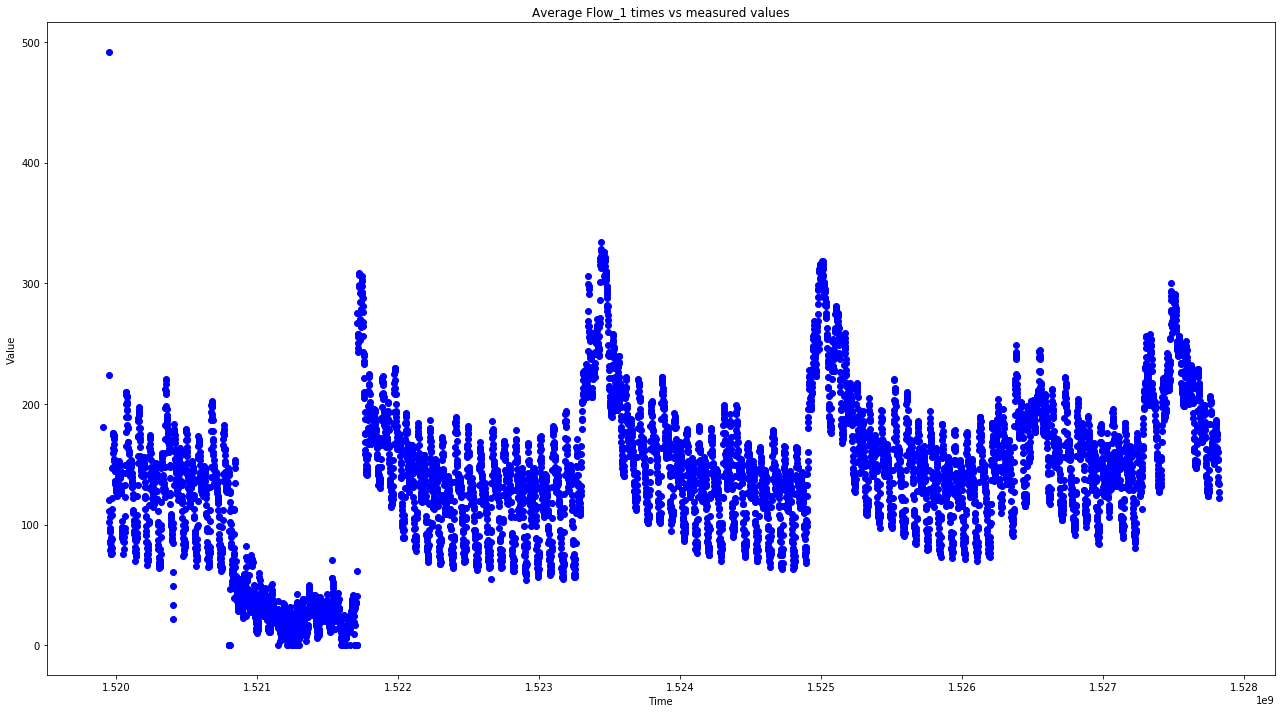

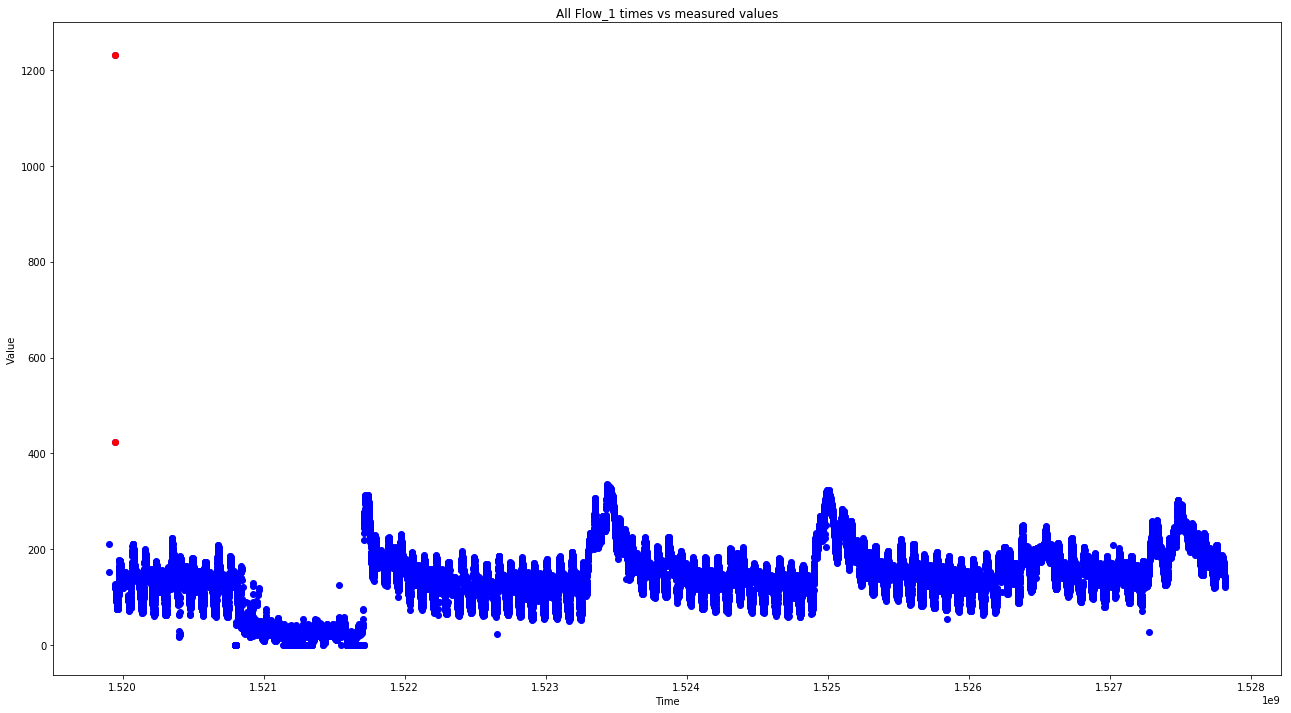

In [4]:
data = open_a_file('flow_1.csv')

print(data[:5])
# Stores the headers
flow1_headers = data[0]

# Stores the data
flow1 = data[1:]

flow1_time, flow1_value = get_time_and_values(flow1)

#print(unique(flow1_time))
#print(unique(flow1_value))

f1, flow1_missing = remove_missing_values(flow1)
        
print('The total number of missing values was: %s' % flow1_missing)

data_flow1 = create_array_of_data(f1)

flow1_time, flow1_value = get_time_and_values(data_flow1)

print(unique(flow1_value))

flow1_avg = find_averages(data_flow1)

plt.figure(figsize = (22,12))
create_scatter('Average Flow_1 times vs measured values', labs, flow1_avg, 'blue')
plt.show()

flow1_outliers = find_outliers(data_flow1, 'gt', 400)

plt.figure(figsize = (22,12))
create_scatter('All Flow_1 times vs measured values', labs, data_flow1, 'blue')
scatter_plot(flow1_outliers, 'red')
plt.show()

From the above graph, it is clearly visible that the pattern produced is seasonal over the time scale. There are also some noticeable outliers. The first seasonal pattern does not quite fit the patterns shown within the rest of the time series. A value early in the process has a large value that does not seem to fit the rest of the graph. There is some event giving low values of the first pattern as well. It would be interesting to determine what the value 0 meant with regard to flow. I would assume that this reading indicates there was a lack of rain, however to have no humans using the water supply in a given day seems an interesting circumstance to investigate further.

the number of missing values was 6
[ 84.396066  91.278859  91.855519  94.278773  95.888874  96.318619
  96.343044  96.499038  96.825509  96.882528  97.218929  98.98074
 100.208468 103.032928 112.966788 115.454907 117.670414 119.295573
 124.717741 128.508052 129.931584 131.681051 133.903847 136.073928
 137.238798 137.284304 137.818634 139.02343  139.300549 139.351306
 140.48553  141.18049  141.467185 143.842837 143.845187 144.299196
 145.773582 145.879988 145.955227 145.960914 147.531398 147.758331
 148.556233 148.757435 148.807524 149.811239 150.164469 150.434864
 151.153284 152.215126 152.325832 152.953973 154.503077 154.543123
 154.739867 154.958647 155.474386 155.720627 156.978954 157.97796
 159.305071 160.779775 162.668063 163.807327 163.945538 164.411682
 166.663875 167.162992 167.495387 168.659402 168.916996 170.434695
 170.734319 170.784954 172.362367 172.688401 173.061162 174.968636
 175.815079 176.099696 176.122449 176.992967 177.073289 177.946703
 178.142699 183.407458]


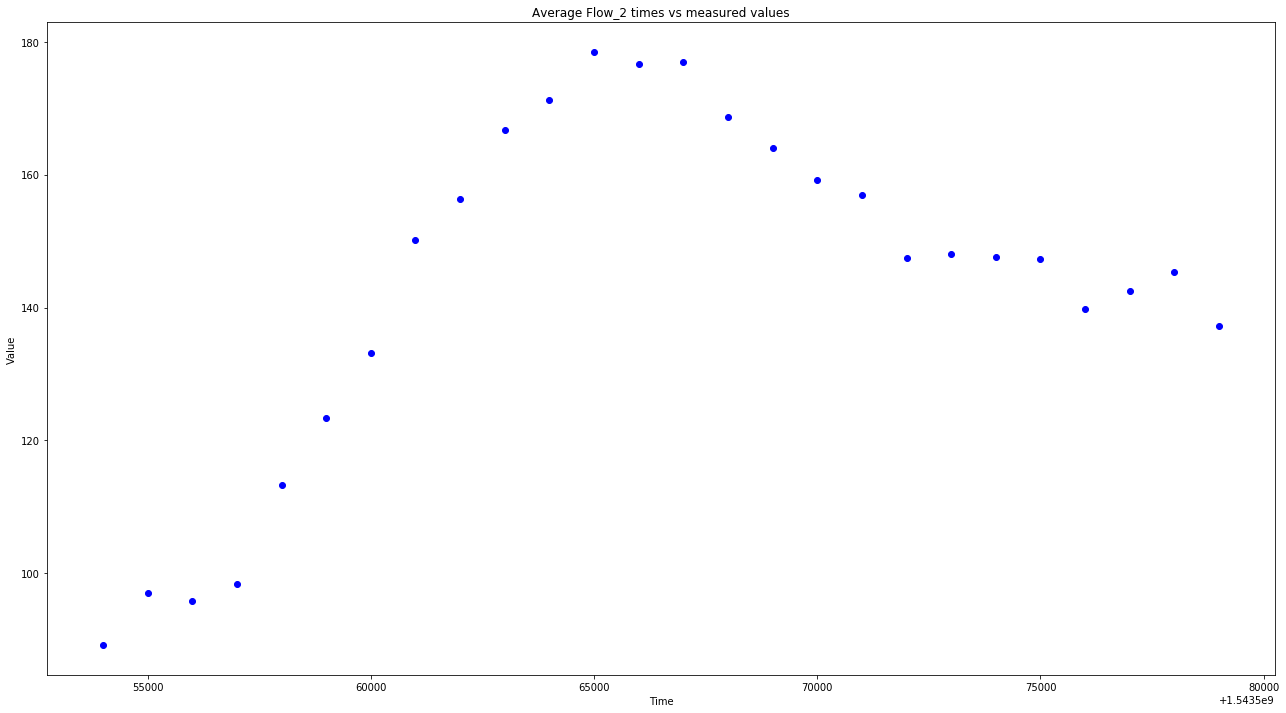

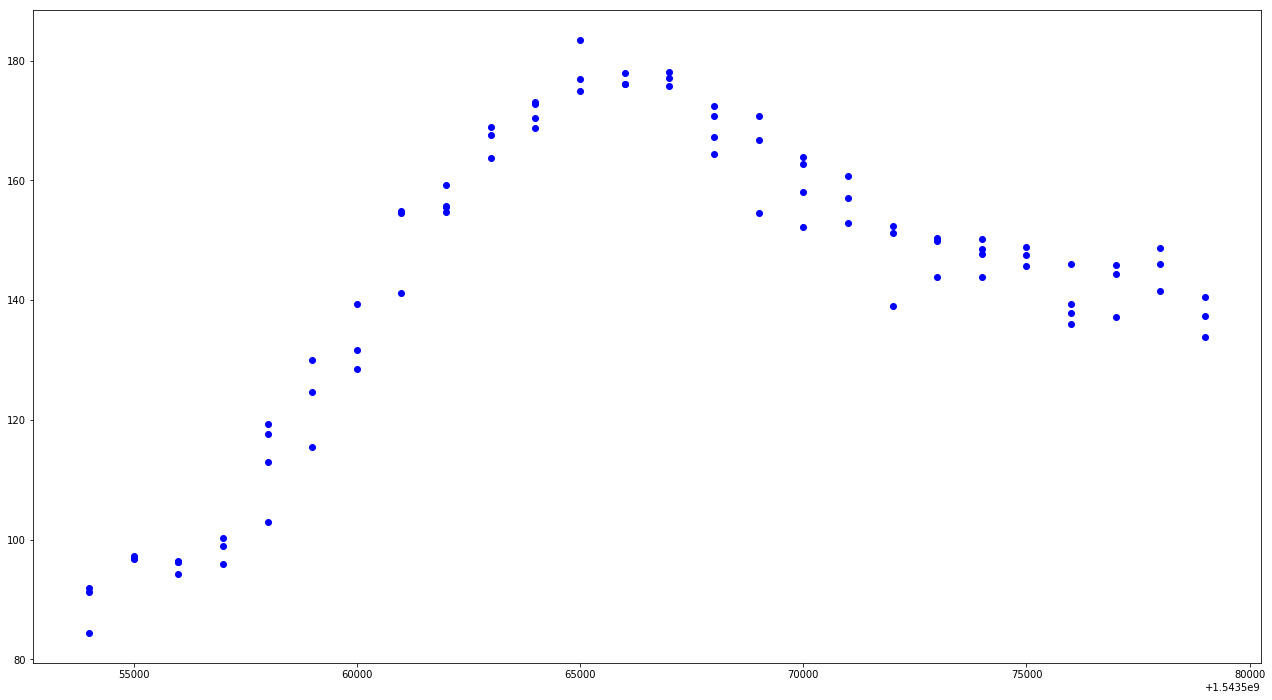

In [5]:
data = open_a_file('flow_2.csv')

#print(data[:5])
flow2_headers = data[0]

flow2 = data[1:]

flow2_time_test, flow2_value_test = get_time_and_values(flow2)

#print(unique(flow2_time_test))
#print(unique(flow2_value_test))

f2, flow2_missing = remove_missing_values(flow2)

print('the number of missing values was %s' % flow2_missing)

data_flow2 = create_array_of_data(f2)

flow2_time, flow2_value = get_time_and_values(data_flow2)

print(unique(flow2_value))

flow2_avg = find_averages(data_flow2)

plt.figure(figsize = (22,12))
create_scatter('Average Flow_2 times vs measured values', labs, flow2_avg, 'blue')
plt.show()

plt.figure(figsize = (22,12))
scatter_plot(data_flow2, 'blue')
plt.show()

From the bove plots, there is not much added information to be gained. As there are few data points across a small amout of time, it would seem that this dataset is showcasing the peaks within the seasonal pattern at a macro level.

the number of missing values was 20
[  0.        21.548424  24.068489 ... 342.058792 345.866496 347.45287 ]


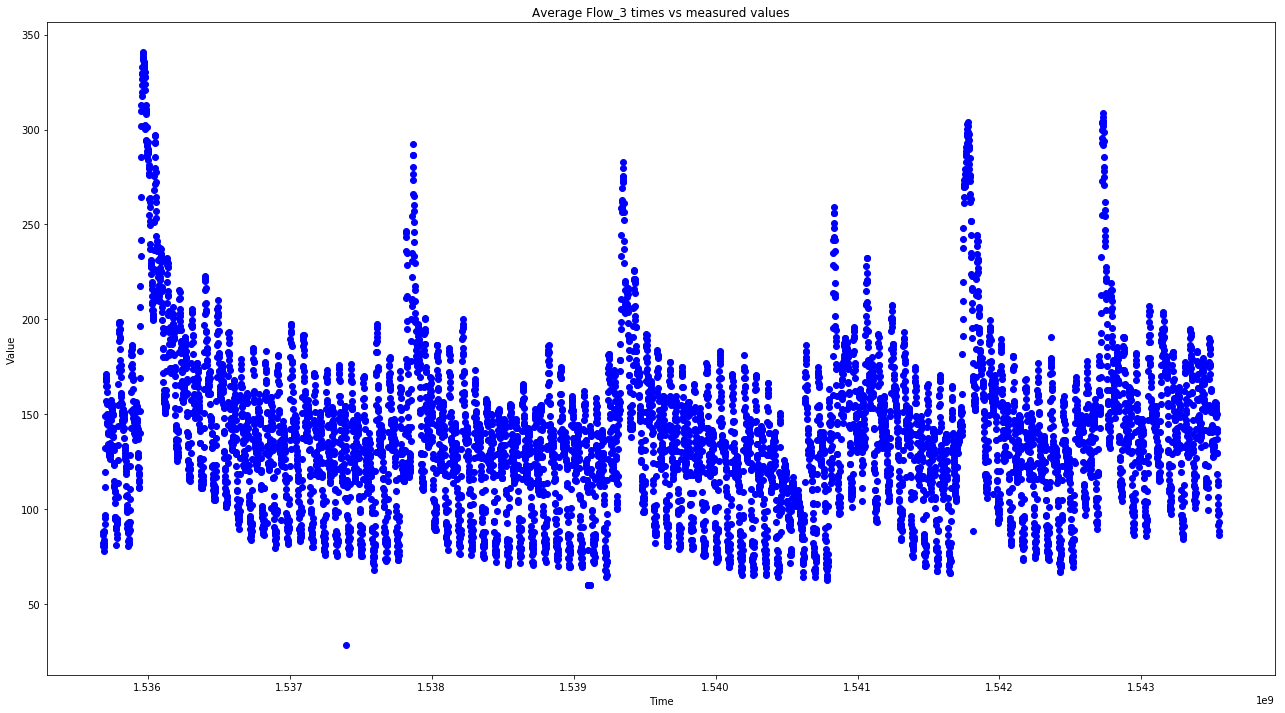

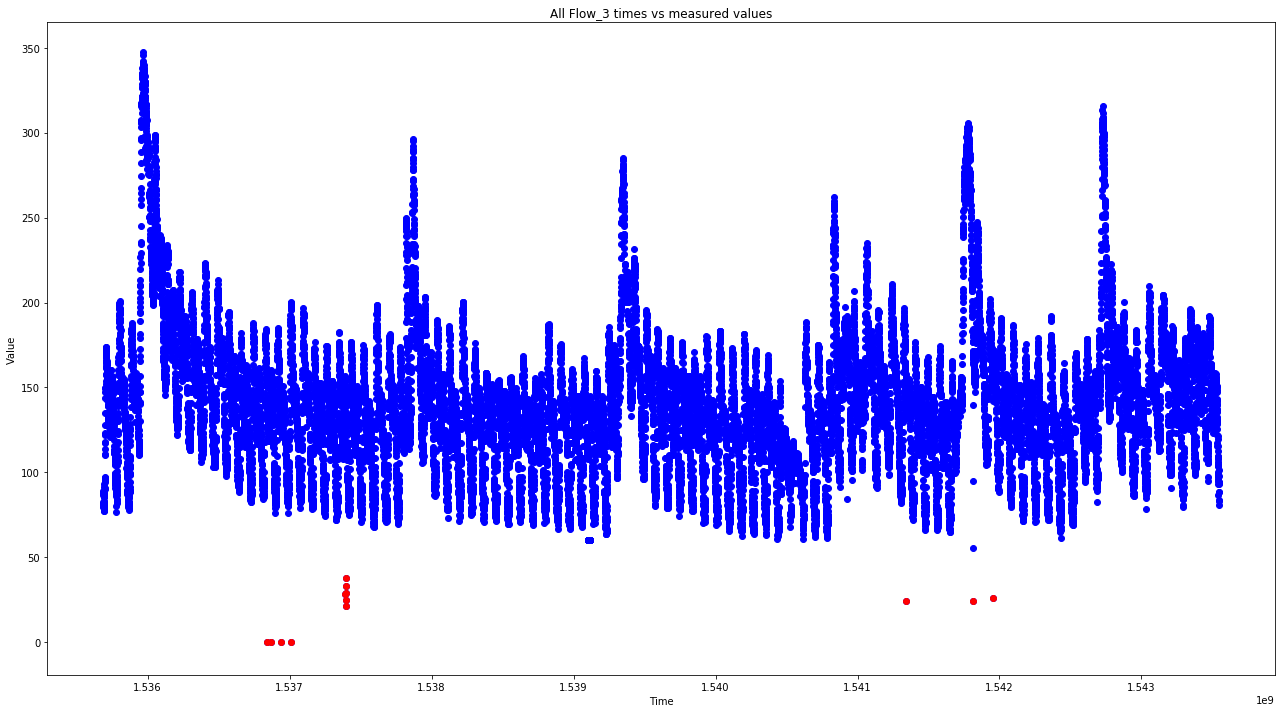

In [6]:
data = open_a_file('flow_3.csv')

#print(data[:5])
flow3_headers = data[0]

flow3 = data[1:]

flow3_time, flow3_value = get_time_and_values(flow3)

#print(unique(flow3_time))
#print(unique(flow3_value))

f3, flow3_missing = remove_missing_values(flow3)

print('the number of missing values was %s' % flow3_missing)

data_flow3 = create_array_of_data(f3)

flow3_time, flow3_value = get_time_and_values(data_flow3)

print(unique(flow3_value))

flow3_avg = find_averages(data_flow3)

plt.figure(figsize = (22,12))
create_scatter('Average Flow_3 times vs measured values', labs, flow3_avg, 'blue')
plt.show()

flow3_outliers = find_outliers(data_flow3, 'lt', 50)

plt.figure(figsize = (22,12))
create_scatter('All Flow_3 times vs measured values', labs, data_flow3, 'blue')
scatter_plot(flow3_outliers, 'red')
plt.show()

Again, the same seasonal pattern is shown with this set of data. The outliers are shown in red. There may be multiple reasons for these outliers. As with previous findings there are measurements of a value zero which seems peculiar.

the number of missing values was 64
[ -5.         0.         9.470056 ... 342.455147 342.527473 343.083241]


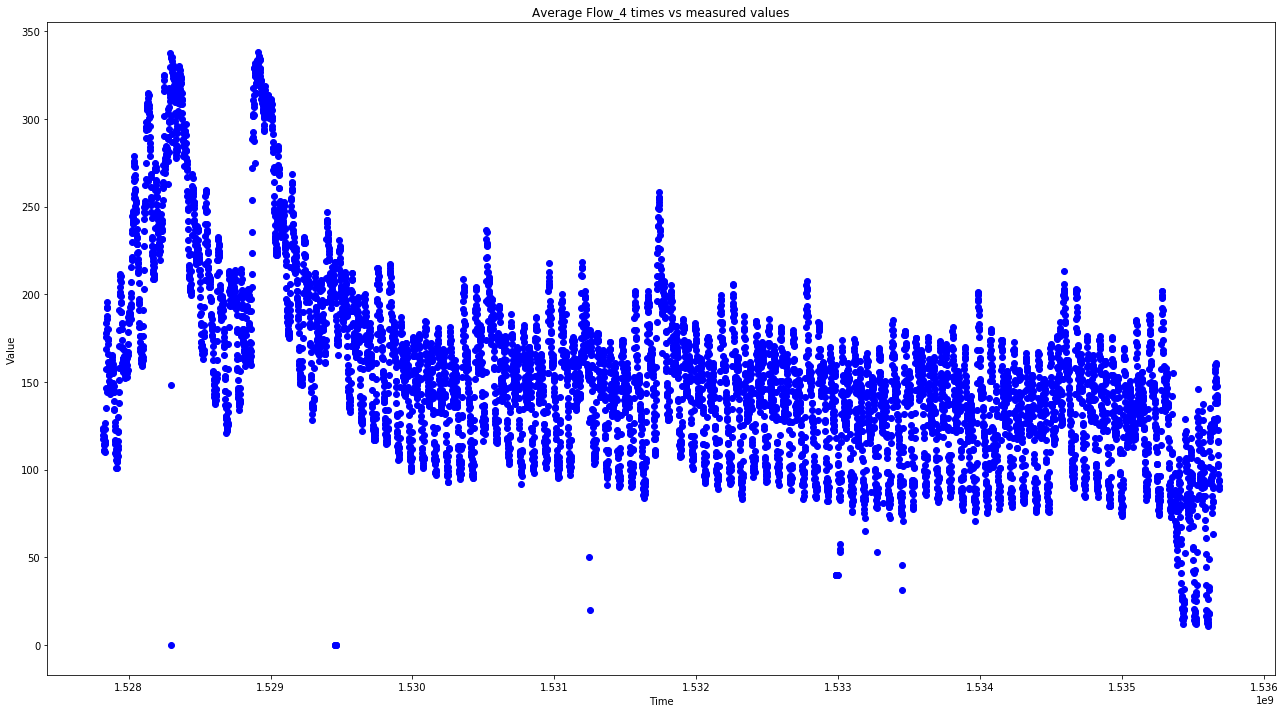

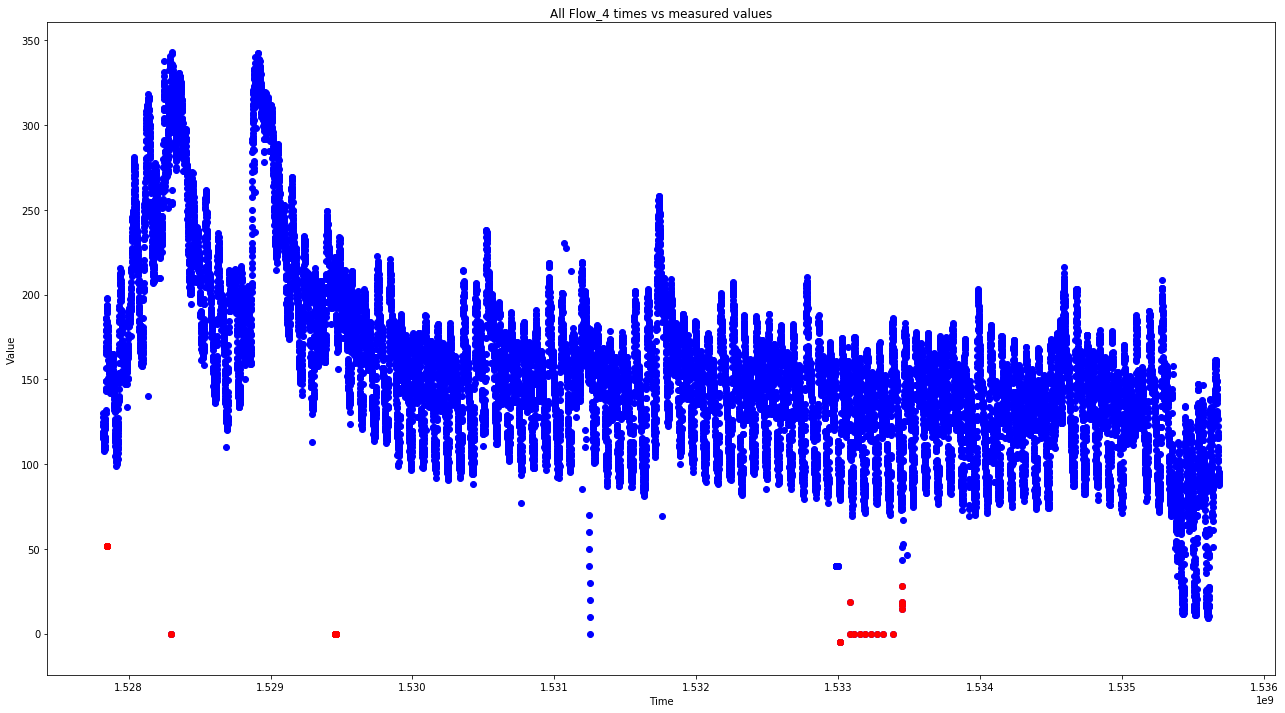

In [7]:
data = open_a_file('flow_4.csv')

#print(data[:5])
flow4_headers = data[0]

flow4 = data[1:]

flow4_time, flow4_value = get_time_and_values(flow4)

#print(unique(flow4_time))
#print(unique(flow4_value))

f4, flow4_missing = remove_missing_values(flow4)

print('the number of missing values was %s' % flow4_missing)

data_flow4 = create_array_of_data(f4)

flow4_time, flow4_value = get_time_and_values(data_flow4)

print(unique(flow4_value))

flow4_avg = find_averages(data_flow4)

plt.figure(figsize = (22,12))
create_scatter('Average Flow_4 times vs measured values', labs, flow4_avg, 'blue')
plt.show()

flow4_outliers = find_outliers(data_flow4, 'lt', 60)

#print(flow4_outliers)

for each in arange(0, len(flow4_outliers)):
    if flow4_outliers[each,0] > 1535000000:
        flow4_outliers[each] = flow4_outliers[0]
    elif flow4_outliers[each,0] > 1531000000 and flow4_outliers[each,0] < 1532000000:
        flow4_outliers[each] = flow4_outliers[0]
    elif flow4_outliers[each,0] > 1531000000 and flow4_outliers[each,1] > 30:
        flow4_outliers[each] = flow4_outliers[0]
        
        
plt.figure(figsize = (22,12))
create_scatter('All Flow_4 times vs measured values', labs, data_flow4, 'blue')
scatter_plot(flow4_outliers, 'red')
plt.show()

Part of the seasonal pattern is presented within the graphs, however this flattens off with the latter stages of the graph. The peaks are less noticeable. The outliers (with relation to time and most points) have been highlighted in red. Some of these points are negative which is rather confusing. This would indicate that the flow of water within the pipe is the opposite to the conventional direction. The cause of this would be interesting to determine with further investigation.

['-0.5' '0.2' '0.4' '0.6' '0.8' '1' '1.2' '1.4' '1.6']


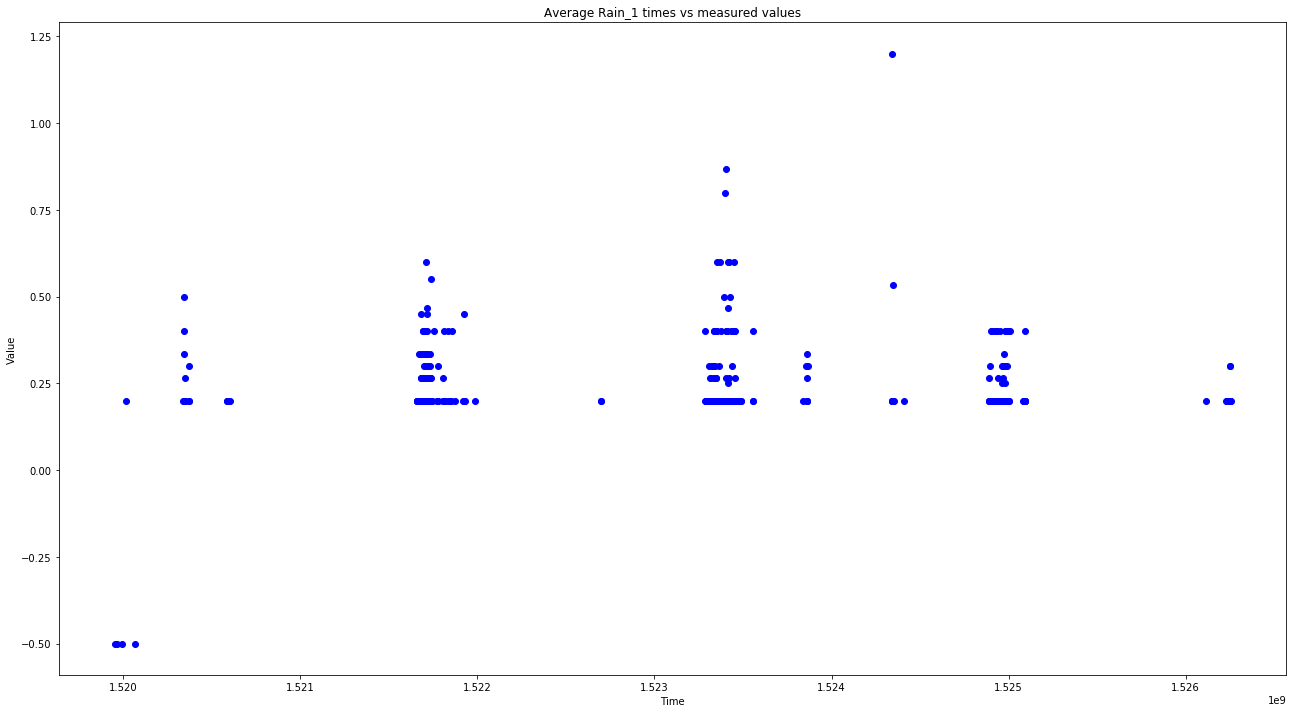

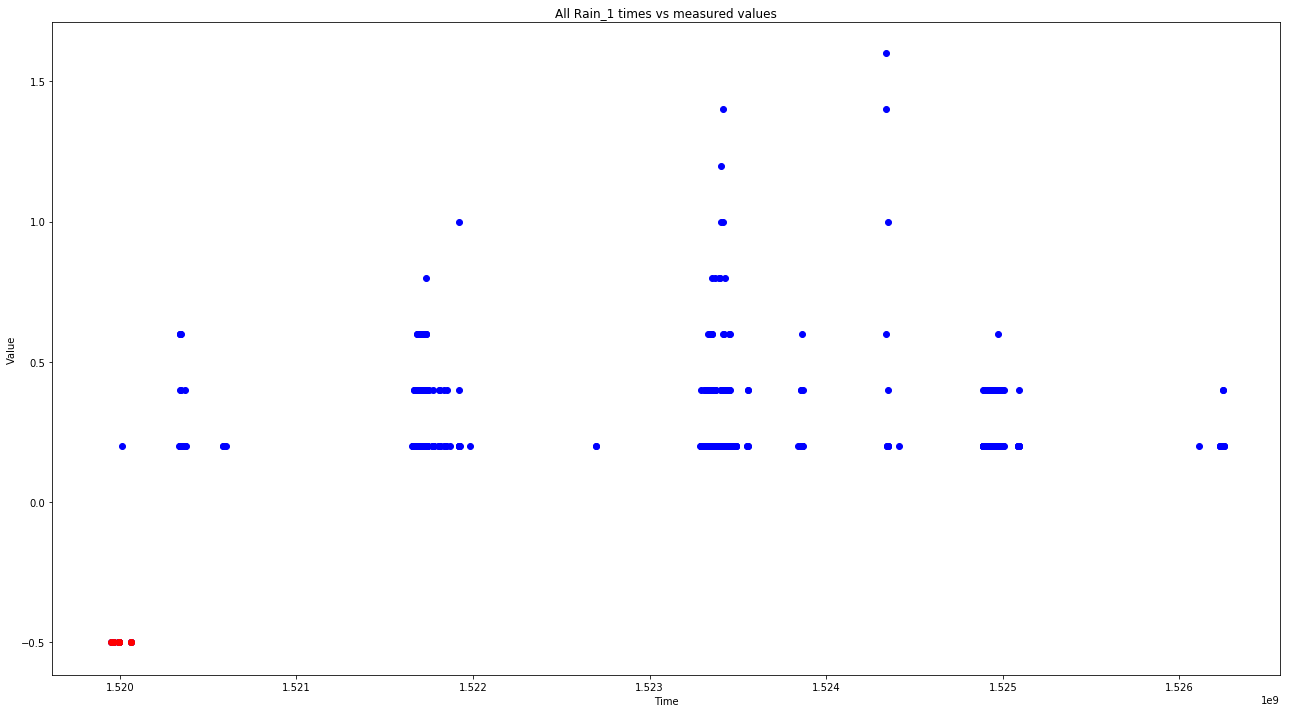

In [8]:
data = open_a_file('rain_1.csv')

#print(data[:5])

rain1_headers = data[0]

rain1 = data[1:]

rain1_time, rain1_value = get_time_and_values(rain1)

#print(unique(rain1_time))
print(unique(rain1_value))

data_rain1 = create_array_of_data(rain1)

rain1_avg = find_averages(data_rain1)

plt.figure(figsize = (22,12))
create_scatter('Average Rain_1 times vs measured values', labs, rain1_avg, 'blue')
plt.show()

rain1_outliers = find_outliers(data_rain1, 'lt', 0)

plt.figure(figsize = (22,12))
create_scatter('All Rain_1 times vs measured values', labs, data_rain1, 'blue')
scatter_plot(rain1_outliers, 'red')
plt.show()

Rain sems to be seasonal and 'arrives' in batches at seemingly consistent intervals for the large down pours. There appears to be negative values for the rain where further investigation would be required into the reason for these.

['-0.5' '0.2' '0.4' '0.6' '0.8' '1' '1.2' '10']


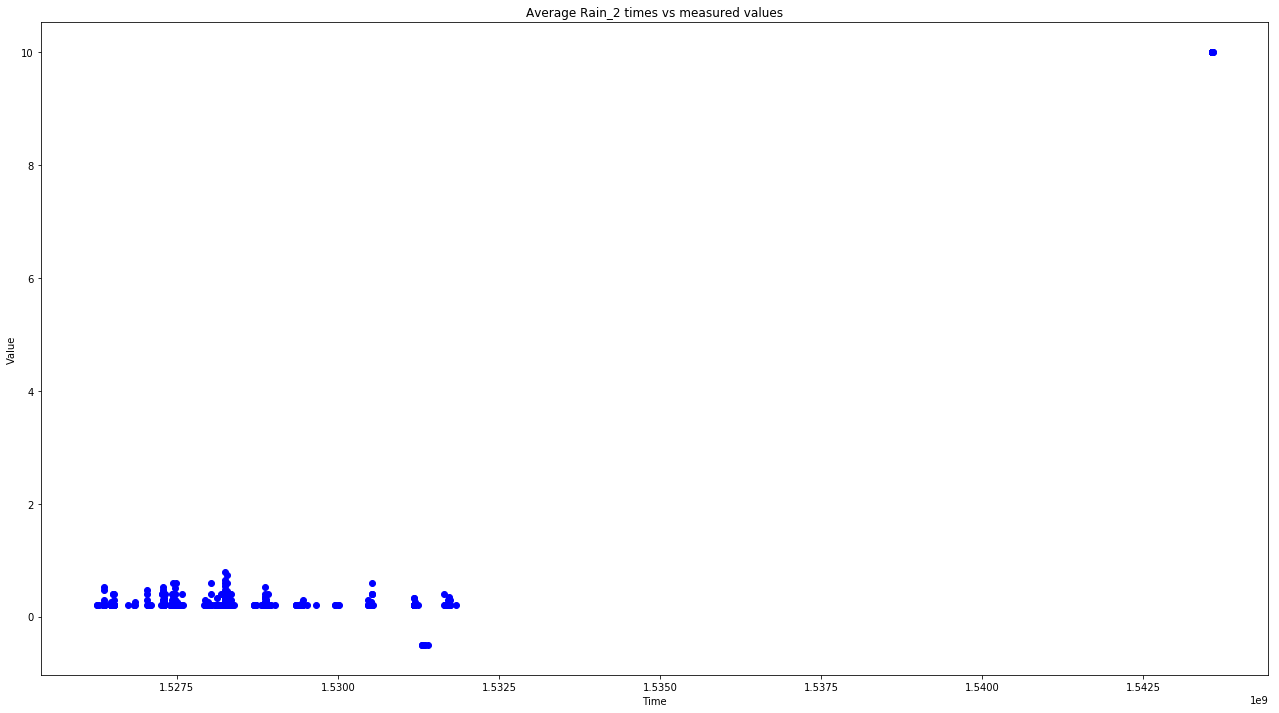

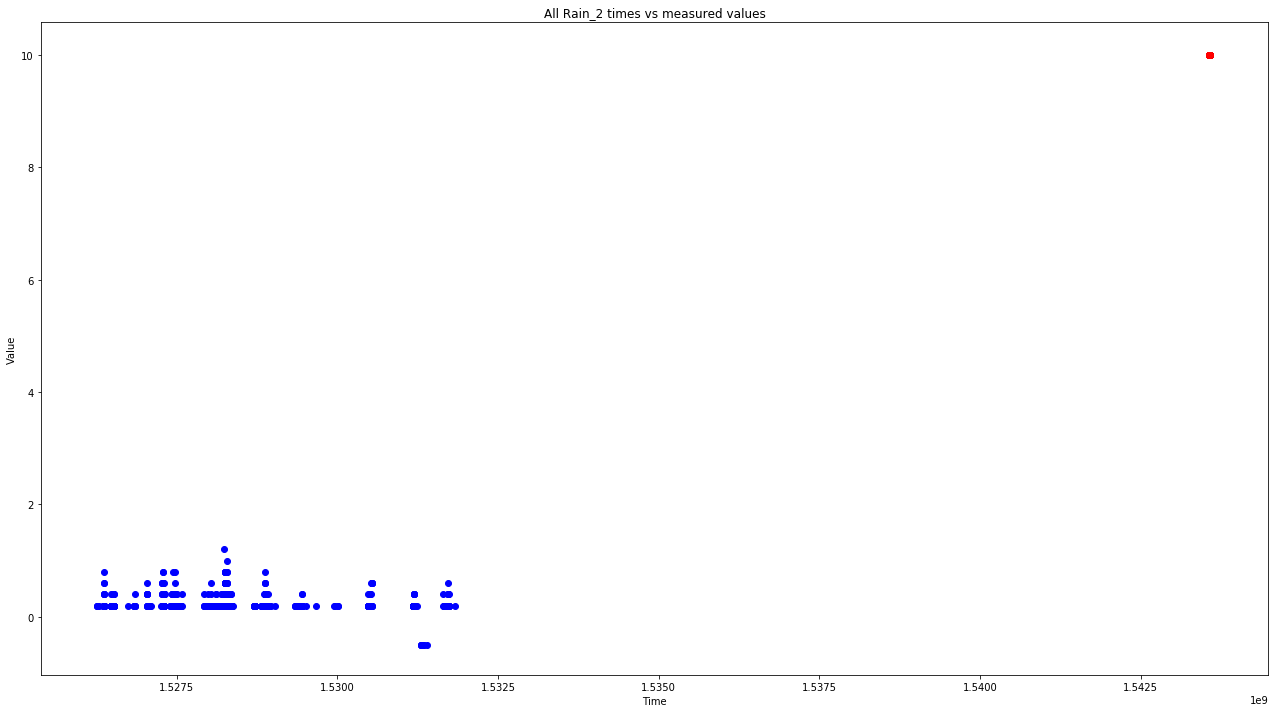

In [9]:
data = open_a_file('rain_2.csv')

#print(data[:5])

rain2_headers = data[0]

rain2 = data[1:]

rain2_time, rain2_value = get_time_and_values(rain2)

#print(unique(rain2_time))
print(unique(rain2_value))

data_rain2 = create_array_of_data(rain2)

rain2_avg = find_averages(data_rain2)

rain2_avg = rain2_avg[rain2_avg[:,0].argsort()]

plt.figure(figsize = (22,12))
create_scatter('Average Rain_2 times vs measured values', labs, rain2_avg, 'blue')
#plt.axis([1526000000, 1535000000,-0.6,2])
plt.show()

rain2_outliers = find_outliers(data_rain2, 'gt', 2)
#print(rain2_outliers)

plt.figure(figsize = (22,12))
create_scatter('All Rain_2 times vs measured values', labs, data_rain2, 'blue')
scatter_plot(rain2_outliers, 'red')
#plt.axis([1526000000, 1535000000,-0.6,2])
plt.show()


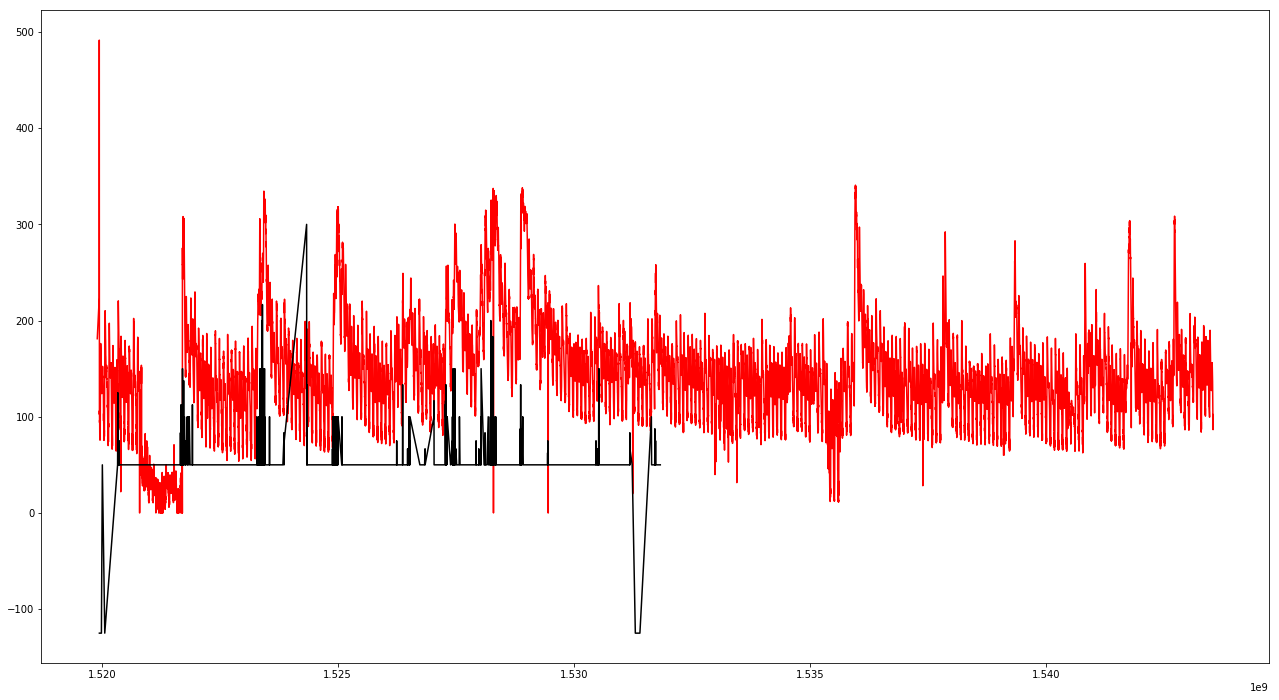

In [10]:
#print(len(rain1), len(rain2))
#print(unique(rain1_time)) # 1519951000 to 1526254000
#print(unique(rain2_time)) # 1526255000 to 1543574000

#print(unique(flow1_time)) # 1519906000 to 1527819000
#print(unique(flow2_time)) # 1543554000 to 1543579000
#print(unique(flow3_time)) # 1535686000 to 1543546000
#print(unique(flow4_time)) # 1527819000 to 1535685000
ra1 = rain1_avg[rain1_avg[:,0].argsort()]
ra2 = rain2_avg[rain2_avg[:,0].argsort()]
f1a = flow1_avg[flow1_avg[:,0].argsort()]
f4a = flow4_avg[flow4_avg[:,0].argsort()]
f3a = flow3_avg[flow3_avg[:,0].argsort()]
f2a = flow2_avg[flow2_avg[:,0].argsort()]

# plt.figure(figsize = (22,12))
# plt.scatter(rain1_avg[:,0], rain1_avg[:,1]*250, c = 'black')
# plt.scatter(data_f1_avg[:,0], data_f1_avg[:,1], c= 'red')
# plt.show()
# print(t[:5])
plt.figure(figsize = (22,12))
plt.plot(f1a[:,0], f1a[:,1], c= 'red')
plt.plot(f4a[:,0], f4a[:,1], c= 'red')
# plt.scatter(ra2[446:,0], ra2[446:,1]*250, c = 'black', s = 100)
plt.plot(f3a[:,0], f3a[:,1], c= 'red')
plt.plot(ra1[:,0], ra1[:,1]*250, c = 'black')
plt.plot(ra2[:446,0], ra2[:446,1]*250, c = 'black')
plt.show()

I've excluded the outliers from the rain_2 data that have extremely large values at a time which is not connected to the rest of the data (this can be added back in by removing the hash). The rain data has then been linearly scaled up in order for a comparison between itself and flow. From the above graph, it would seem that (in general) there is rain that is measured followed by an increase in flow. This would be reasonable to assume as if the flow of household water is fairly constant, adding rain water would increase the flow. <br>
Although rain has only been given for half the time scale, the seasonal pattern continues at stages later in the time series. This pattern could be used to predict the rain measurements that occured during these times.

Part 2 <br>
Summary <br>

Abnormalities: <br>
1. Missing times that required removing.
2. Missing values that required removing.
3. Negative rain values.
4. Zero values in flow data.
5. Outliers for values that didn't fit their 'time location'
6. There are no instances of no rain which seems unusual as even the UK has days where it doesn't rain.

Relationship between Flow and Rain: <br>
1. Flow has a slight negative trend when there is minimal rain.
2. Larger measurements of rain lead to increased flow soon after.
3. Seasonal rain leasds to structured seasonal flow.
4. Less structured rain leads to less cyclical flow patterns.

Bonus: <br>
Create a seasonal ARIMA model to predict flow based on previous flow and rain data. This would be performed by checking for stationarity and seasonality along with ACF and PACF plots to determine the non-seasonal 'parts' of the model. Then the seasonal components of the model could be estimated. R is useful for performing these tasks. The model would have to be seasonal in order to incorporate the seasonal aspect of the rain and allow for the peaks. To validate the model, it would be a good idea to try and predict the last three months and check to see if the model aligns with the true results.